##  Práctica: Predicción del precio de automóviles con Regresión Lineal Múltiple

###  Contexto

Una empresa automovilística china, **Geely Auto**, desea establecerse en el mercado estadounidense. Para ello, necesita **comprender qué factores influyen en el precio de los coches**. Tu tarea será construir un modelo predictivo con **Python y scikit-learn** que estime el precio de un automóvil a partir de sus características técnicas.

El conjunto de datos `CarPrice_Assignment.csv` contiene información de 205 modelos de coches vendidos en EE. UU., con variables como el tipo de combustible, tamaño del motor, peso, potencia, número de puertas, entre otros.

---

###  Objetivos de aprendizaje

* Aplicar el flujo completo de un **proyecto de Machine Learning supervisado**.
* Limpiar, analizar y preparar datos para su uso en un modelo predictivo.
* Entrenar y evaluar un modelo de **regresión lineal múltiple**.
* Interpretar los coeficientes y evaluar el rendimiento del modelo.
* Representar gráficamente los resultados y comunicar conclusiones.

---

###  Conocimientos previos

* Python y bibliotecas: `pandas`, `numpy`, `matplotlib`, `seaborn`, `sklearn`.
* Conceptos básicos de regresión lineal y normalización de variables.




---

###  Desarrollo paso a paso

#### **Paso 1: Cargar y explorar los datos**

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv('dataset/CarPrice_Assignment.csv') #Cargamos el dataset
#print(df) #Imprimimos el dataset
print(df.shape) #Comprobamos numero de filas y columnas
#print(df.isnull().sum()) #Comprobamos si hay valores nulos (NO los hay)
#Columnas numéricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("\nColumnas numéricas:", list(num_cols))
#Columnas categóricas
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print("\nColumnas categóricas:", list(cat_cols))



(205, 26)

Columnas numéricas: ['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

Columnas categóricas: ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


* Comprueba número de filas y columnas.
* Identifica valores nulos o erróneos.
* Observa qué columnas podrían ser **variables categóricas** y cuáles **numéricas**.


#### **Paso 2: Limpieza de datos**

1. Extrae el nombre de la compañía de `CarName`.
2. Corrige errores ortográficos comunes (`vokswagen`, `toyouta`, etc.).
3. Elimina duplicados, si los hubiera.
4. Convierte todas las cadenas de texto a minúsculas.

In [3]:
#A la vez que cambiamos las cadenas a minusculas, guardamos el nombre de la compañia (separamos la primera palabra).  
df['CarName'] = df['CarName'].str.lower() #Convertimos a minusculas
df['CompanyName'] = df['CarName'].apply(lambda x: x.split()[0]) #Separamos por el primer espacio
#pd.set_option('display.max_rows', None) #Elimina el limite de filas mostradas
#print(df.CompanyName) #Comprobamos nuestra nueva columna
df['CompanyName'] = df['CompanyName'].replace({ #Correjimos errores ortográficos
    'maxda': 'mazda',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen',
    'porshe': 'porsche',
    'alfa-romero': 'alfa-romeo' 
})

#print(df.CompanyName) #Comprobamos

#i_rows = len(df)
df.drop_duplicates(inplace=True) #Eliminamos duplicados
#a_rows = len(df)

#if i_rows != a_rows:   ##Comprobamos si habia filas duplicadas
    #print(f"Se eliminaron {i_rows - a_rows} filas duplicadas.")
#else:
    #print("No se encontraron filas duplicadas.")

#No existian filas duplicadas, el codigo de arriba solo funciona la primera vez, pero se dejará de ejemplo

#### **Paso 3: Análisis exploratorio**

* Visualiza la distribución de los precios.
* Muestra histogramas y diagramas de caja de las variables principales:

  * `fueltype`, `carbody`, `drivewheel`, `enginetype`
  * `horsepower`, `enginesize`, `curbweight`, `carwidth`
* Calcula la **matriz de correlación** y representa el **heatmap**.

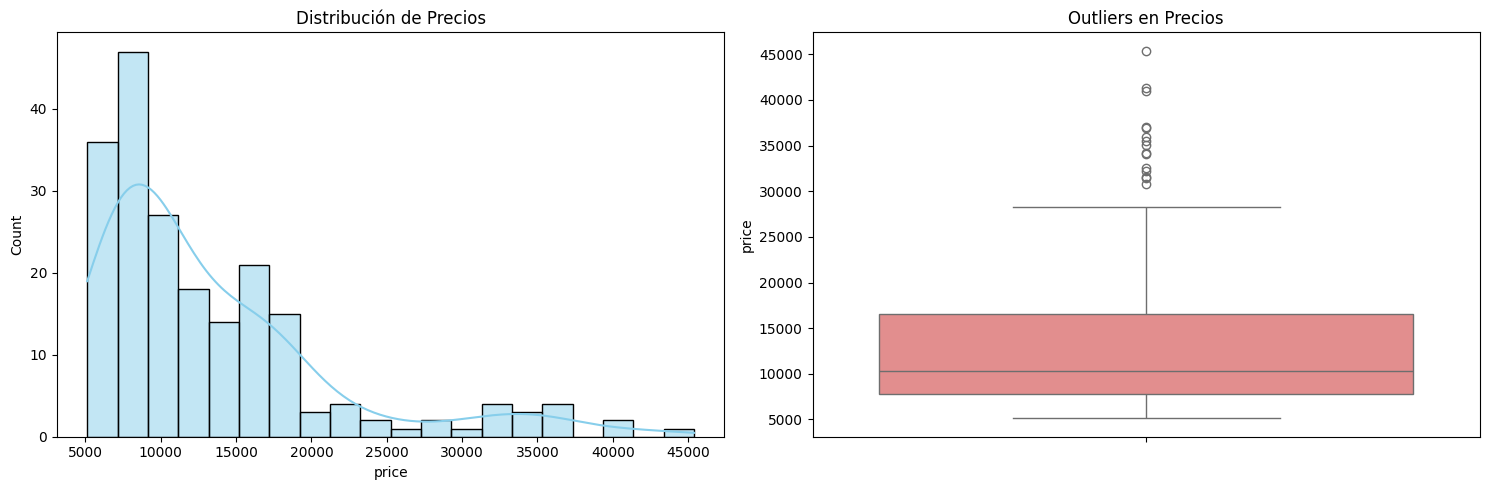

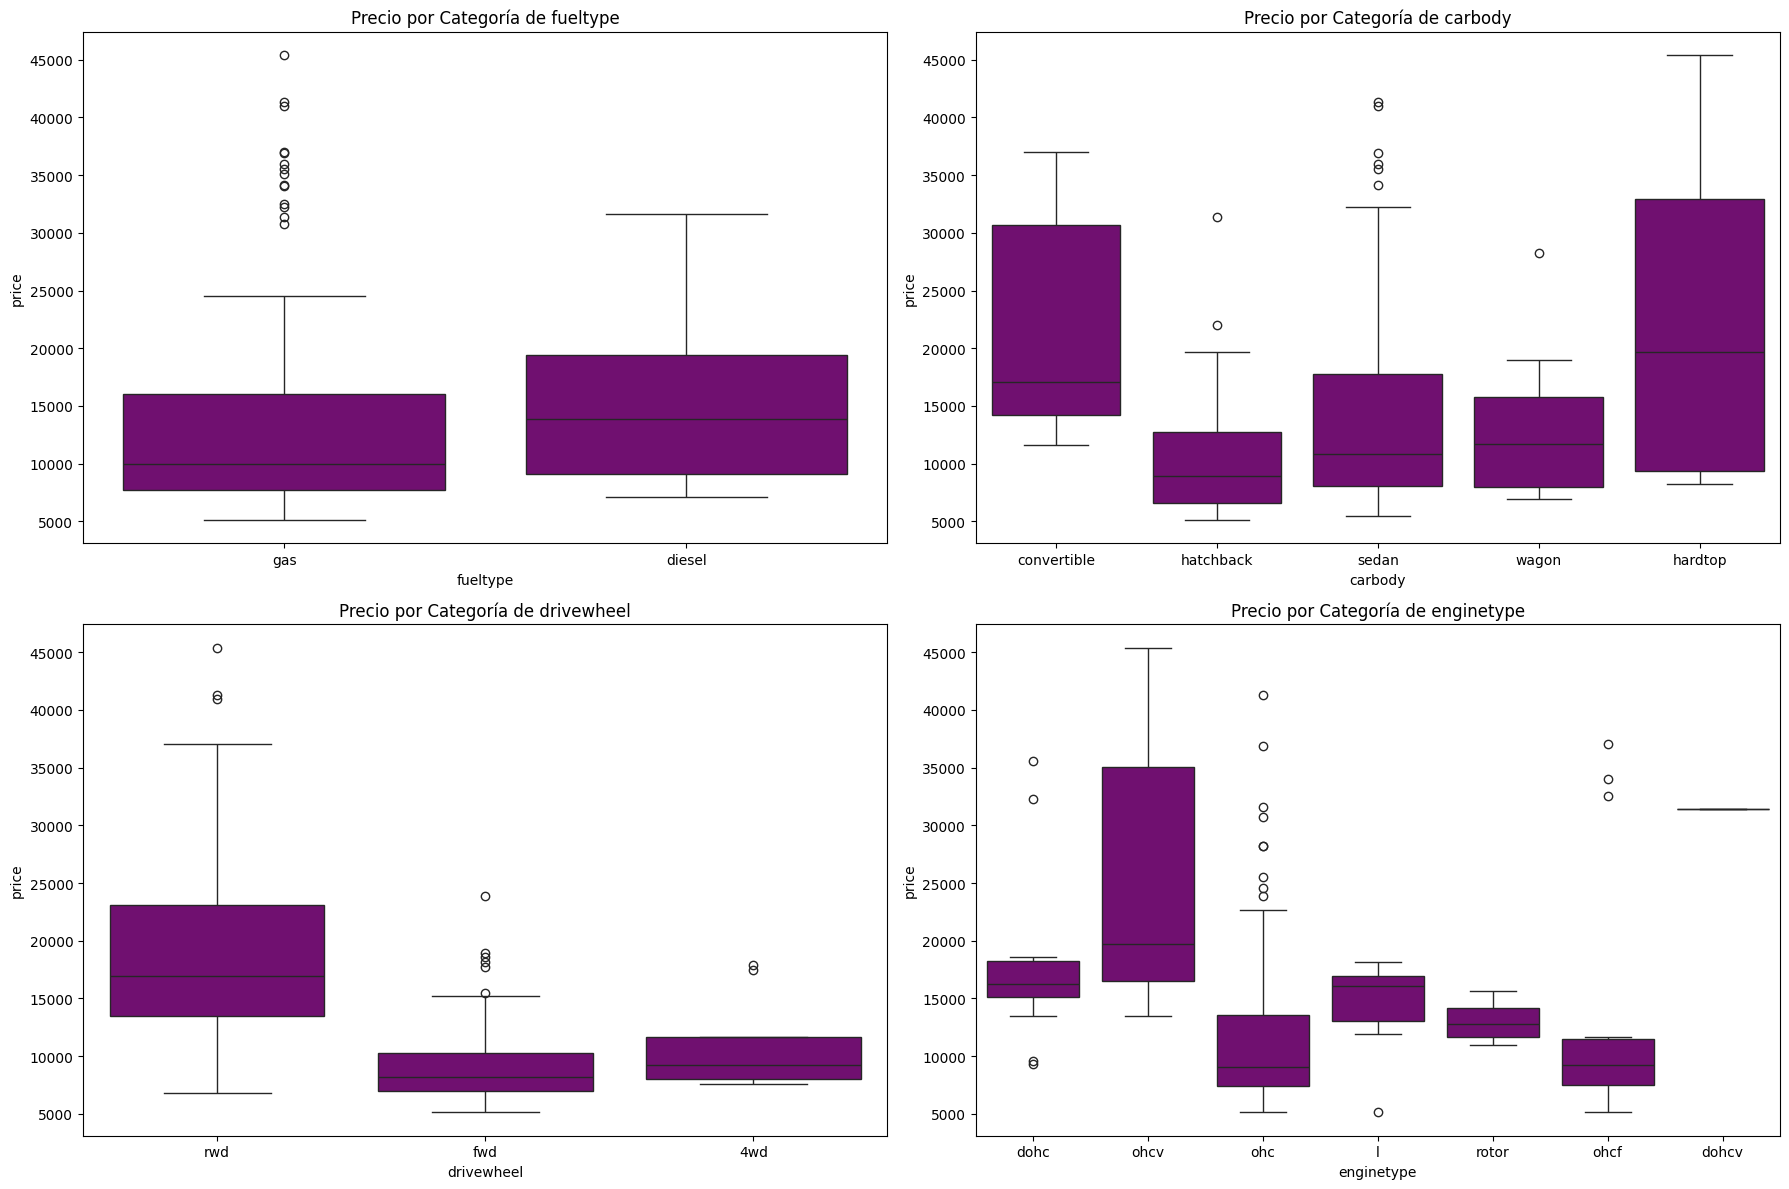

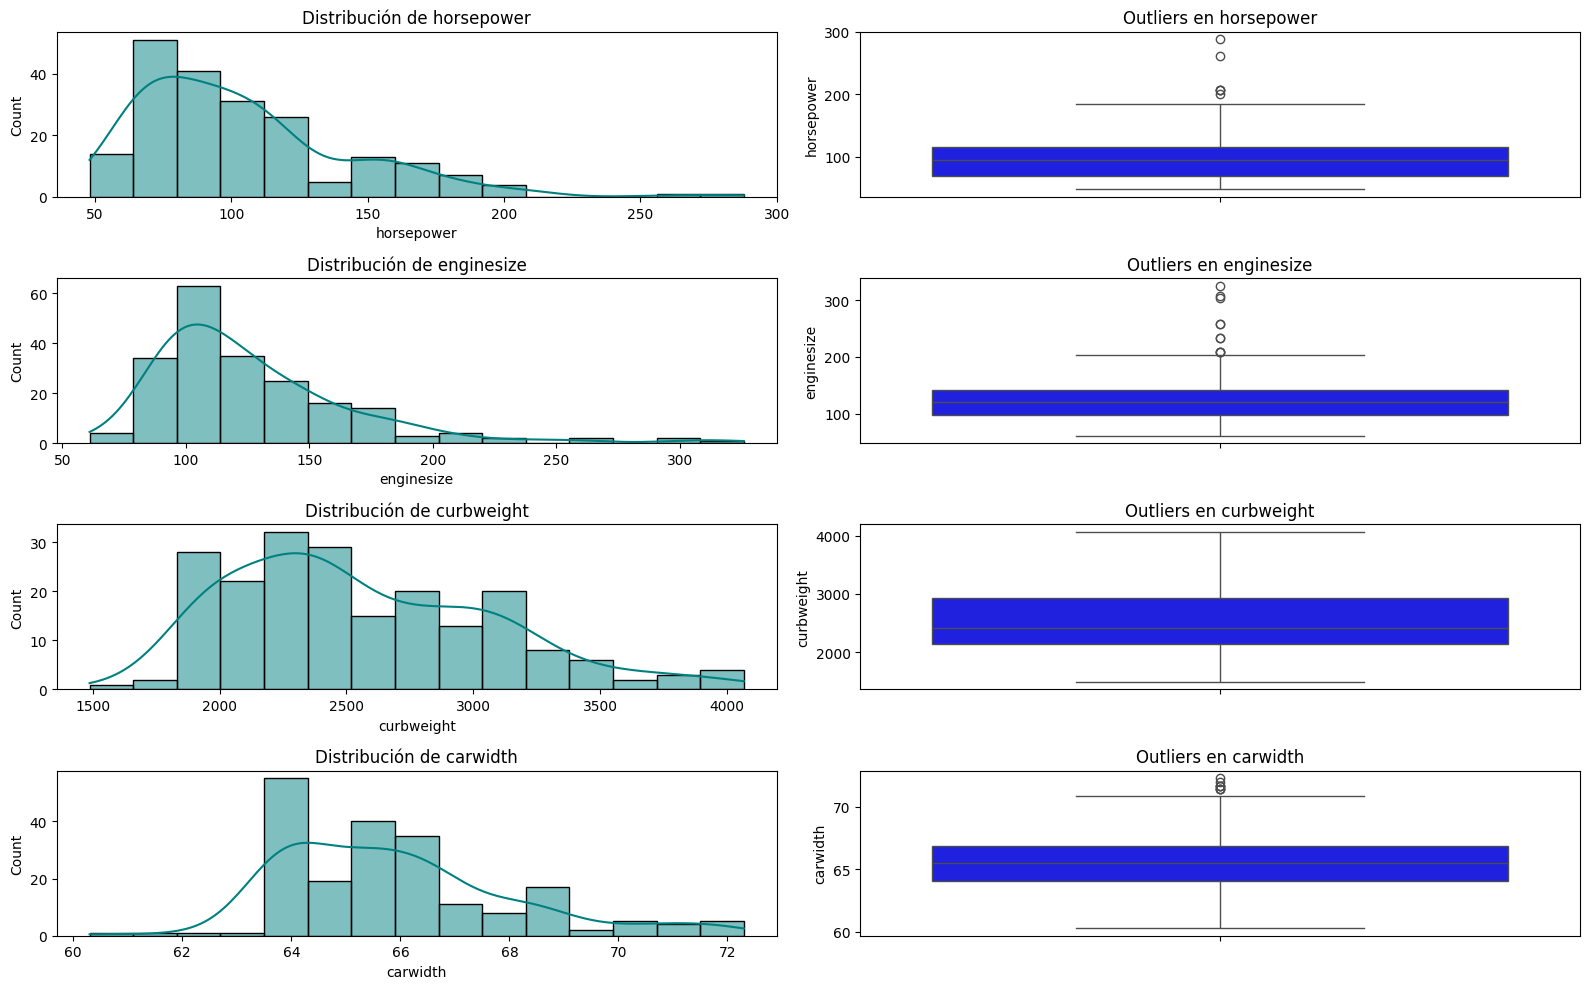

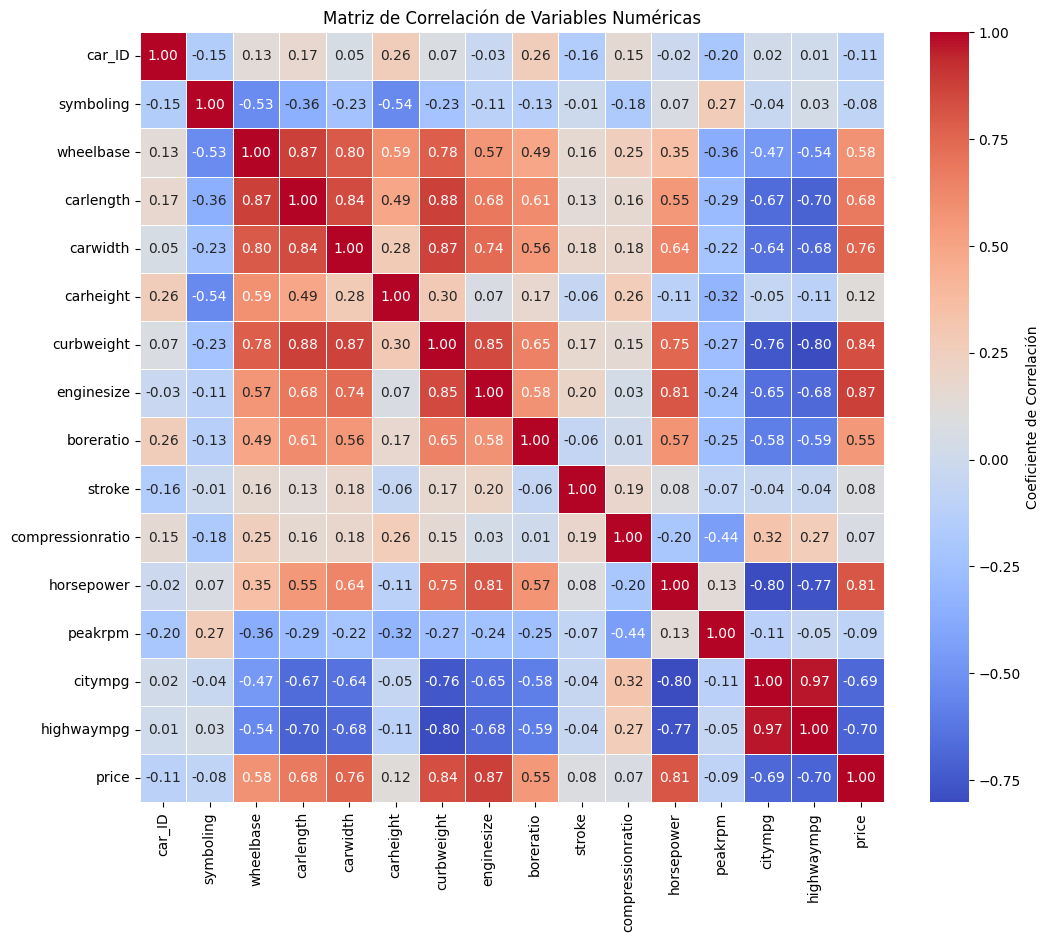

In [4]:
df['price'].describe() #Imprimimos datos de price (min, max, mediana, cuartiles...)

#Visualizamos la distribucion de precios
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1) #Histograma
sns.histplot(df['price'], kde=True, bins=20, color='skyblue')
plt.title('Distribución de Precios')

plt.subplot(1, 2, 2) 
sns.boxplot(y=df['price'], color='lightcoral') #Boxplot 
plt.title('Outliers en Precios')

plt.tight_layout()
plt.show()

#Para las variables categóricas, vamos a visualizar como el precio cambia en cada categoria.
plt.figure(figsize=(18, 12))
for i, col in enumerate(['fueltype', 'carbody', 'drivewheel', 'enginetype']):
    plt.subplot(2, 2, i + 1)
    # Usamos Box Plots para ver la distribución y mediana del precio para cada categoría
    sns.boxplot(x=df[col], y=df['price'], color='purple')
    plt.title(f'Precio por Categoría de {col}')
    plt.xlabel(col)
    plt.ylabel('price')
    
plt.tight_layout()
plt.show()

#Mostramos Histogramas y Diagramas de Caja de las variables numéricas
plt.figure(figsize=(16, 10))
for i, col in enumerate(['horsepower', 'enginesize', 'curbweight', 'carwidth']):
    # 1. Histograma (Distribución)
    plt.subplot(4, 2, 2*i + 1)
    sns.histplot(df[col], kde=True, bins=15, color='teal')
    plt.title(f'Distribución de {col}')

    # 2. Diagrama de Caja (Detección de Outliers)
    plt.subplot(4, 2, 2*i + 2)
    sns.boxplot(y=df[col], color='blue')
    plt.title(f'Outliers en {col}')

plt.tight_layout()
plt.show()

#Calculamos la matriz de correlación
(df.corr(numeric_only=True)["price"].sort_values(ascending=False)) #Mostramos la correlacion de las variables numéricas con respecto al precio, con el objetivo de su análisis
correlation_matrix = df.corr(numeric_only=True) #Calculamos la matriz de correlación, con todos las variables numéricas (incluido el precio)
plt.figure(figsize=(12, 10)) #Mostramos el mapa de calor
sns.heatmap(
    correlation_matrix, 
    annot=True,        
    cmap='coolwarm',   
    fmt=".2f",         
    linewidths=.5,     
    cbar_kws={'label': 'Coeficiente de Correlación'}
)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()


                                                                    

#### **Paso 4: Generar nuevas variables**

* Crea una variable `fueleconomy = 0.55 * citympg + 0.45 * highwaympg`
* Agrupa las compañías por precio medio y clasifícalas como:

  * `Budget` (menos de 10 000 $)
  * `Medium` (10 000 – 20 000 $)
  * `Highend` (más de 20 000 $)


In [5]:
df['fueleconomy'] = 0.55 * df['citympg'] + 0.45 * df['highwaympg'] #Creamos la variable fueleconomy
df.groupby('CompanyName')['price'].mean().sort_values(ascending=False) #Mostramos la lista de compañias y su precio medio asociado

precio_medio = {    #Asociamos cada compañia con su clasificación
    'jaguar': 'Highend', 'buick': 'Highend', 'porsche': 'Highend', 'bmw': 'Highend',
    'volvo': 'Medium', 'audi': 'Medium', 'mercury': 'Medium', 'alfa-romeo': 'Medium',
    'peugeot': 'Medium', 'saab': 'Medium', 'mazda': 'Medium', 'nissan': 'Medium',
    'volkswagen': 'Medium',
    'toyota': 'Budget', 'renault': 'Budget', 'mitsubishi': 'Budget', 
    'isuzu': 'Budget', 'subaru': 'Budget', 'honda': 'Budget', 'plymouth': 'Budget', 
    'dodge': 'Budget', 'chevrolet': 'Budget'
}

df['CompanyPrecio'] = df['CompanyName'].map(precio_medio) #Creamos una nueva variable categórica aplicando precio_medio a la columna CompanyName
#print(df.CompanyPrecio) #Comprobamos

#Actualizamos los valores de la categoria cylindernumber para convertirla a numérica
cylinder_map = {
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'eight': 8,
    'twelve': 12
}

df['cylindernumber'] = df['cylindernumber'].map(cylinder_map) #Aplicamos el mapeo
median_cylinders = df['cylindernumber'].median()
df['cylindernumber'] = df['cylindernumber'].fillna(median_cylinders) #Rellenamos valores nulos con la media

#Actualizamos los valores de la categoria doornumber para convertirla a numérica
door_map = {
    'two': 2, 
    'four': 4,
} #Solo hay 2 o 4

df['doornumber'] = df['doornumber'].map(door_map) #Aplicamos el mapeo
mode_doornumber = df['doornumber'].mode()#Usamos .mode() para asegurar que obtenemos el valor más frecuente
df['doornumber'] = df['doornumber'].fillna(mode_doornumber)

print(df.cylindernumber) #Comprobamos
#print(df['doornumber'].dtype) #Comprobamos los tipos
#print(df['cylindernumber'].dtype) 



0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: cylindernumber, Length: 205, dtype: int64


#### **Paso 5: Preparar datos para el modelo**

1. Selecciona las variables más significativas (numéricas + categóricas).
2. Genera **variables dummy** con `pd.get_dummies()` (drop_first=True).
3. Divide en **X** (predictoras) e **y** (precio).
4. Realiza un **train-test split** (70 % – 30 %).
5. Aplica **normalización Min-Max o Z-score** sobre las variables numéricas.


In [6]:
#Variables categóricas a seleccionar: fueltype, carbody, drivewheel, enginetype, CompanyPrecio (son las que tienen mayor influencia en el precio)
#Variables numéricas a seleccionar: enginesize, curbweight, horsepower, cardwidth (mayor correlación con el precio)

dummi = [   #Declaramos nuestras variables a dummificar
    'fueltype', 'carbody', 'drivewheel', 'enginetype', 'CompanyPrecio', 
    'aspiration', 'enginelocation', 'fuelsystem', 'doornumber'
]
#Generamos variables dummy
df_dummies = pd.get_dummies(df, columns=dummi, drop_first=True)
#Asignamos la variable dependiente (precio)
Y = df_dummies['price'] 
#X es el resto de las columnas, excluyendo el ID, las variables originales y la variable dependiente
X = df_dummies.drop(['price', 'car_ID', 'CarName', 'CompanyName', 'citympg', 'highwaympg'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42) #Hacemos el train-test split (70-30)

#Normalizamos el resto de columnas numéricas restantes en X, sin tener en cuenta las variables dummy
escalar_col = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = StandardScaler() #Inicializamos el escalador
#print(escalar_col)     #Comprobación

X_train[escalar_col] = scaler.fit_transform(X_train[escalar_col]) #Transformamos para calcular la media y la desviación típica del conjunto de entrenamiento.
X_test[escalar_col] = scaler.transform(X_test[escalar_col]) #Transformamos el conjunto de prueba
print(X_train.isnull().sum().sort_values(ascending=False).head())

symboling    0
wheelbase    0
carlength    0
carwidth     0
carheight    0
dtype: int64


#### **Paso 6: Entrenamiento del modelo**

In [ ]:
lr = LinearRegression() #Creamos el modelo
lr.fit(X_train, Y_train) #Entrenamos el modelo
Y_pred = lr.predict(X_test) #Generamos la predicción


El Intercepto es: 16521.086864068977
Los Coeficientes son: [-1.12132339e+02  2.69833618e+02 -6.37763301e+01  1.97342426e+03
  2.35832625e+02  1.85772999e+03 -5.05760609e+02  2.67561504e+03
 -9.09592687e+02 -5.08097338e+02 -3.36069303e+01  2.33328108e+02
  6.39652404e+02  8.05176384e+00  4.49375669e+02  6.04303498e+01
 -4.37377733e+03 -4.33615025e+03 -5.84223196e+03 -1.19506606e+03
 -6.69726348e+02 -4.97991396e+01 -2.66280057e+03 -1.08888818e+02
 -4.46992973e+02 -1.09662473e+03  5.12170127e+03  8.05612448e+03
  6.34461625e+02  2.48176962e+03  6.02624702e+03  8.26978968e+01
 -8.08953279e+02 -4.49375669e+02 -9.09494702e-13 -6.39444685e+01
 -1.58321807e+03  7.71359206e+02  4.90340446e+02]


#### **Paso 7: Evaluación**

Calcula las métricas:

In [1]:
r_squared = r2_score(Y_test, Y_pred) #Calculamos R2
print(f"R2: {r_squared}")

mse = mean_squared_error(Y_test, Y_pred) #Calculamos el MSR
print(f"MSE: {mse}")

rmse = np.sqrt(mse) #Calculamos el RMSE
print(f"RMSE: {rmse}")


NameError: name 'r2_score' is not defined

Representa la relación entre los valores reales y predichos:


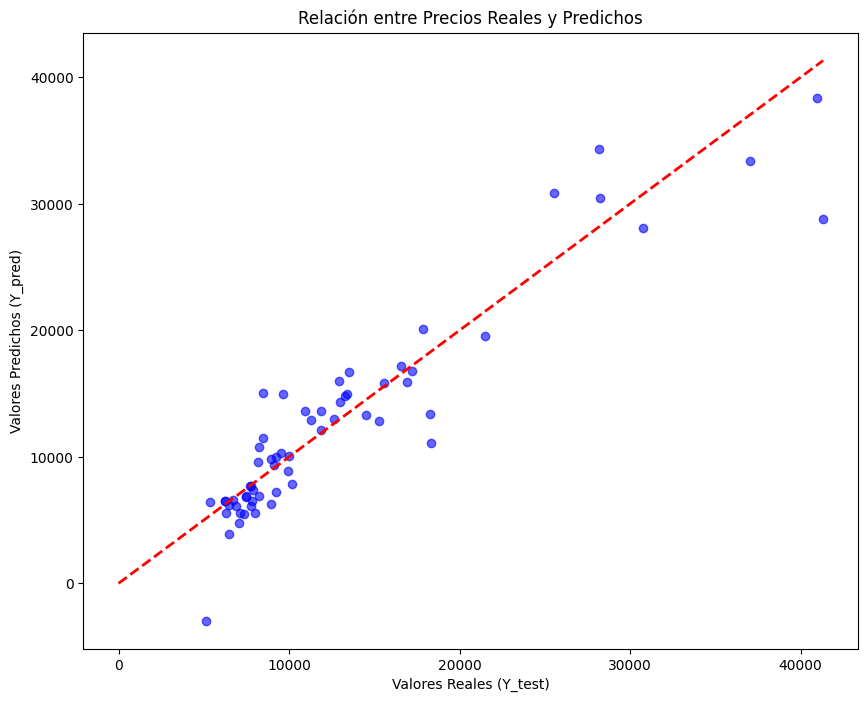

In [151]:
max_price = max(Y_test.max(), Y_pred.max()) #Calculamos el valor máximo del precio para definir la longitud máxima de la línea de igualdad

plt.figure(figsize=(10, 8))
plt.scatter(Y_test, Y_pred, color='blue', alpha=0.6) 
plt.plot([0, max_price], [0, max_price], color='red', linestyle='--', linewidth=2, label='Línea de Igualdad (Y=X)')
plt.xlabel("Valores Reales (Y_test)")
plt.ylabel("Valores Predichos (Y_pred)")
plt.title("Relación entre Precios Reales y Predichos")
plt.show()

#### **Paso 8: Interpretación**

* Analiza los coeficientes (`lr.coef_`) para identificar qué variables influyen más.
* Comenta qué implicaciones tendría para el negocio (por ejemplo, “aumentar la potencia incrementa el precio, pero reducir el consumo mejora la eficiencia”).

In [ ]:
print("El Intercepto es:", lr.intercept_)   #Mostramos el intercepto
print("Los Coeficientes son:", lr.coef_) #Mostramos los coeficientes (pesos de las variables)
print(X_train.columns)  #Para asociar visualmente las variables con sus coeficientes


El Intercepto es: 16521.086864068977
Los Coeficientes son: [-1.12132339e+02  2.69833618e+02 -6.37763301e+01  1.97342426e+03
  2.35832625e+02  1.85772999e+03 -5.05760609e+02  2.67561504e+03
 -9.09592687e+02 -5.08097338e+02 -3.36069303e+01  2.33328108e+02
  6.39652404e+02  8.05176384e+00  4.49375669e+02  6.04303498e+01
 -4.37377733e+03 -4.33615025e+03 -5.84223196e+03 -1.19506606e+03
 -6.69726348e+02 -4.97991396e+01 -2.66280057e+03 -1.08888818e+02
 -4.46992973e+02 -1.09662473e+03  5.12170127e+03  8.05612448e+03
  6.34461625e+02  2.48176962e+03  6.02624702e+03  8.26978968e+01
 -8.08953279e+02 -4.49375669e+02 -9.09494702e-13 -6.39444685e+01
 -1.58321807e+03  7.71359206e+02  4.90340446e+02]
Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'fueleconomy',
       'fueltype_gas', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carb

In [ ]:
#Las variables fuertes son aquellas que tienen mayor impacto en el precio, tanto positivo como negativo.
#Las variables positivas fuertes a tener en cuenta por la compañía podrían ser:
# - CompanyPrecio_Highend (+8,056.12): El sector de lujo aumenta los precios.
# - enginelocation_rear (+6,026.25): La ubicación trasera del motor incrementa fuertemente el precio.
# - enginesize (+2,675.62): Un mayor tamaño del motor resulta en un precio más alto.
# - aspiration_turbo (+2,481.77): La inclusión de un turbocargador impulsa el precio.
# - carwidth (+1,973.42): Un vehículo más ancho tiene un precio superior.
# - curbweight (+1,857.73): Un mayor peso en vacío del vehículo implica un precio mayor.
# - enginetype_rotor (+5,121.70): Este tipo de motor está asociado a un alto valor.

#Variables fuertes negativas:
# - carbody_wagon (-5,842.23): El tipo de carrocería 'wagon' es el mayor factor de devaluación.
# - carbody_hatchback (-4,373.78): La carrocería 'hatchback' también reduce drásticamente el precio.
# - carbody_sedan (-4,336.15): La carrocería 'sedan' reduce el precio significativamente.
# - enginetype_l (-2,662.80): Este tipo de motor tiene un fuerte efecto negativo en el precio.

#Las variables débiles son aquellas que tienen un impacto menor o menos significativo
#No merece la pena distinguir entre negativas y positivas ya que no se tendrán tanto en cuenta estas variables más débiles
# - drivewheel_fwd (-1,195.07)
# - enginetype_ohcv (-1,096.62)
# - boreratio (-909.59)
# - peakrpm (+639.65)
# - CompanyPrecio_Medium (+634.46)
# - stroke (-508.10)
# - cylindernumber (-505.76)
# - doornumber_4 (+490.34)
# - fueltype_gas (+449.38)
# - horsepower (+233.33)

#Las variables sin relación tienen un impacto casi nulo en el precio, apenas afectan a la estimación de este.
# - fueleconomy (+8.05): La variable de economía de combustible no es un factor que el mercado
#   estadounidense valore significativamente al fijar el precio.
# - compressionratio (-33.61)
# - carbody_hardtop (+60.43)
# - fuelsystem_mpfi (-63.94)
# - carlength (-63.78)
# - enginetype_dohcv (-49.80)
# - fuelsystem_mfi (-9.09e-13): El impacto es esencialmente cero.

#### Extra

- Investigar como exportar el modelo entrenado (`joblib` o `pickle`) para reutilizarlo.

- Investigar como utilizar otros modelos: **Ridge**, **Lasso**, **RandomForestRegressor**.


### Rúbrica

| Criterio                      | Básico (5)                               | Esperado (7–8)                                      | Avanzado (9–10)                                               |
| ----------------------------- | ---------------------------------------- | --------------------------------------------------- | ------------------------------------------------------------- |
| Limpieza de datos             | Se corrigen nombres y nulos parcialmente | Dataset correctamente limpio                        | Incluye validaciones y comprobaciones automáticas             |
| Análisis exploratorio         | Usa pocas variables y gráficos simples   | Utiliza varios tipos de gráficos con interpretación | Detecta patrones relevantes y correlaciones significativas    |
| Modelo de regresión           | Modelo básico entrenado                  | Ajusta parámetros, evalúa R² y errores              | Compara varios modelos y justifica selección                  |
| Interpretación y conclusiones | Breves o genéricas                       | Conclusiones razonadas con datos                    | Analiza implicaciones de negocio y mejora                     |
| Presentación del notebook     | Desordenado o sin comentarios            | Bien estructurado y comentado                       | Incluye Markdown, secciones claras y resultados reproducibles |